In [1]:
#!pip install tensorflow
import tensorflow as tf

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!conda info


     active environment : base
    active env location : C:\Users\windows10\anaconda3
       user config file : C:\Users\windows10\.condarc
 populated config files : C:\Users\windows10\.condarc
          conda version : 4.9.1
    conda-build version : 3.18.11
         python version : 3.7.6.final.0
       virtual packages : __cuda=10.2=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\windows10\anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\windows10\anaconda3\pkgs
                          C:\Users\windo

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train1, y_train1), (X_test1, y_test1) = fashion_mnist.load_data()

In [6]:
X_train = X_train1.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test1.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train1.astype(np.int32)
y_test = y_test1.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [7]:
X_train.shape

(55000, 784)

In [8]:
X_train.dtype

dtype('float32')

In [9]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\windows10\\anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17254902,
       0.49803922, 0.7137255 , 0.7254902 , 0.6313726 , 0.47058824,
       0.21568628, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16470589, 0.7764706 , 0.9843137 , 1.        , 0.9843137 ,
       0.9764706 , 0.96862745, 1.        , 0.9882353 , 0.83921

In [13]:
y_train[0]

4

### Model Creation

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [28, 28]))
model.add(keras.layers.Dense(300, activation= 'relu'))
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [15]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(300, activation= 'relu'),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.05836537,  0.01996708,  0.03478044, ...,  0.00064241,
        -0.06943745, -0.06217699],
       [ 0.02423757,  0.05696772,  0.06870039, ..., -0.01574584,
         0.07347991, -0.04052715],
       [-0.07343649,  0.05411379,  0.02490509, ..., -0.04229815,
         0.04960863,  0.05325077],
       ...,
       [ 0.02201081, -0.07308338,  0.06434138, ...,  0.02753339,
        -0.07435033,  0.04981187],
       [-0.04117064,  0.05449805,  0.05085373, ..., -0.02849372,
        -0.00012448,  0.00974432],
       [-0.02027229, -0.0258931 , -0.02211609, ..., -0.06836782,
        -0.04398919, -0.03656784]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

### Compiling the model

In [26]:
model.compile(loss= "sparse_categorical_crossentropy", 
             optimizer= "sgd", 
             metrics= ["accuracy"])

### Training and evaluating the model

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7136 - accuracy: 0.7663 - val_loss: 0.5422 - val_accuracy: 0.8078
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4893 - accuracy: 0.8313 - val_loss: 0.4380 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4435 - accuracy: 0.8447 - val_loss: 0.4136 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4158 - accuracy: 0.8545 - val_loss: 0.3963 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3947 - accuracy: 0.8615 - val_loss: 0.3915 - val_accuracy: 0.8590
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3790 - accuracy: 0.8660 - val_loss: 0.4013 - val_accuracy: 0.8592
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8702 - val_loss: 0.3616 - val_accuracy:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

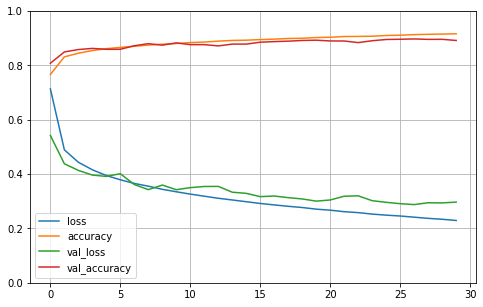

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8797


[0.33960625529289246, 0.8797000050544739]

### Making Prediction

In [40]:
X_new = X_test[:6]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.01, 0.  , 0.01, 0.  , 0.89, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
y_pred= model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6, 1], dtype=int64)

In [43]:
y_new= y_test[:6]
y_new

array([9, 2, 1, 1, 6, 1])

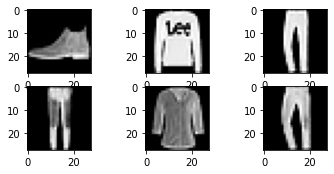

And the Predictions are ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser']


In [46]:
for i in range(len(y_new)):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_test1[i],cmap=plt.get_cmap('gray'))
# show the figure
plt.show()
print("And the Predictions are", np.array(class_names)[y_pred])